In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
filepath = "../input/mushroom-classification/mushrooms.csv"
mushroom_data = pd.read_csv(filepath)
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
mushroom_data.shape

(8124, 23)

In [7]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

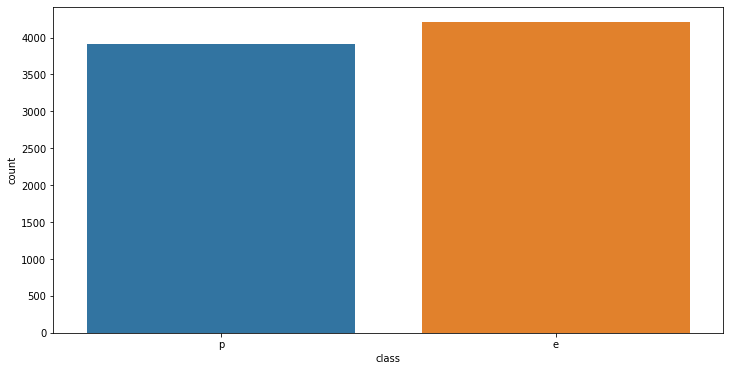

In [9]:
plt.figure(figsize = (12,6))
sns.countplot(mushroom_data["class"])

<Figure size 1728x1008 with 0 Axes>

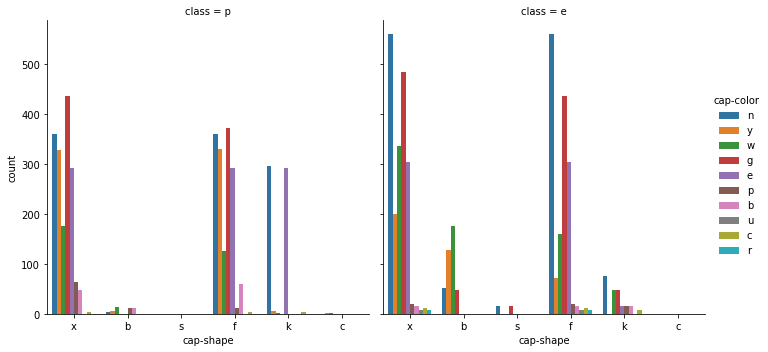

In [18]:
plt.figure(figsize = (24,14))
sns.catplot(data = mushroom_data, x= "cap-shape", hue="cap-color", kind="count", col="class")

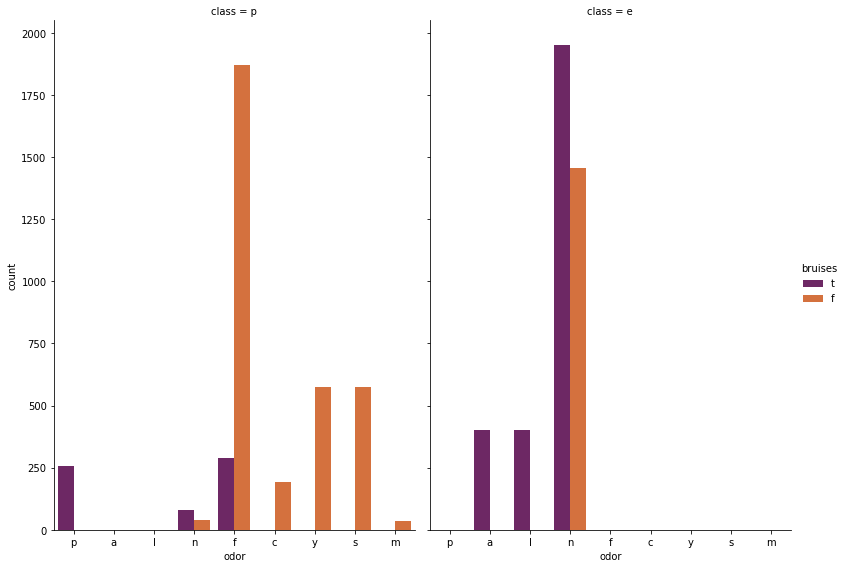

In [21]:
sns.catplot(data = mushroom_data, x= "odor", hue="bruises", col="class", kind="count", palette="inferno", height=8, aspect=.7)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mushroom_data = mushroom_data.apply(LabelEncoder().fit_transform)
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [47]:
from sklearn.model_selection import train_test_split

X = mushroom_data.drop(["class"], axis = 1)
y = mushroom_data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 0)
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5314,5,2,8,1,2,1,0,0,3,1,...,2,7,7,0,2,1,4,1,4,1
2075,5,2,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,3
5165,2,2,8,1,2,1,0,0,7,1,...,2,7,7,0,2,1,4,1,3,1
1155,0,3,8,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,3,3
4448,5,3,9,0,2,1,0,0,3,0,...,1,0,0,0,2,1,2,1,5,1


# Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state= 0, max_depth = 7)
model.fit(X_train , y_train)
model.score(X_train, y_train)

1.0

In [56]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

1.0

# Able to predict with 100% accuracy (not sure if this should happen)